In [22]:
# This sets up the graphing configuration
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
import pandas as pd
import statsmodels.formula.api as smf

# Imports our new data set!
dataset = pd.read_csv('AppleStock.csv')
 
###    
# REPLACE <printDataHere> with print(dataset.head())
###
dataset.head()
###

,Date,Close,Volume,Open,High,Low
0,6/25/2020,364.84,34380630.0,360.70,365.00,357.57
1,6/24/2020,360.06,48155850.0,365.00,368.79,358.52
2,6/23/2020,366.53,53038870.0,364.00,372.38,362.27
3,6/22/2020,358.87,33861320.0,351.34,359.46,351.15
4,6/19/2020,349.72,66118950.0,354.64,356.56,345.15


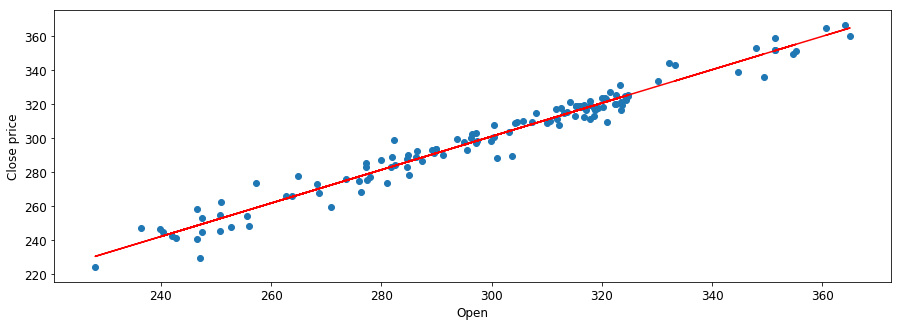

R²: 0.9647762830382911


In [24]:
formula = 'Close ~ Open'
###

# This performs linear regression
lm = smf.ols(formula = formula, data = dataset).fit()

featureName = formula.split(" ")[-1]

# Get the data for the x parameter (the feature)
x = dataset[featureName]

# This makes and shows a graph
intercept = lm.params[0]
slope = lm.params[1]
line = slope * x + intercept
graph.plot(x, line, '-', c = 'red')
graph.scatter(x, dataset.Close)
graph.ylabel('Close price')
graph.xlabel(featureName)
graph.show()
print("R²: " + str(lm.rsquared))

In [25]:
###
# IN THE LINE BELOW REPLACE <addCocoaPercentHere> WITH cocoa_percent AND <addCostPercentHere> WITH cost
###
formula = 'Close ~ Volume + Open'
###

# This creates a new model with all three features
lm = smf.ols(formula = formula, data = dataset).fit()

# Print the coefficients (slopes) of our new model
print(lm.params)

print("R²: " + str(lm.rsquared))

Intercept    1.251675e+01
Volume      -4.401703e-08
Open         9.680037e-01
dtype: float64
R²: 0.9653025634252839


In [26]:
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def calculateClosePrice(volume, open_price) :
    
    coeff_intercept = lm.params[0]
    coeff_vol = lm.params[1]
    coeff_open_price = lm.params[2]
    
    close_price = coeff_intercept + (coeff_vol * volume) 
    + (coeff_open_price * open_price)
    
    return close_price

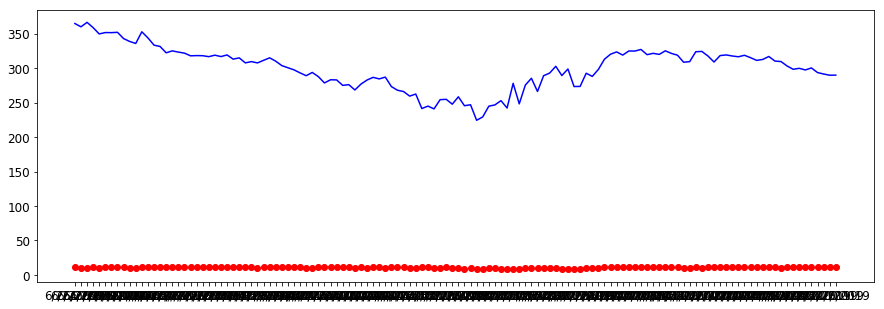

In [34]:
original_prices = dataset.Close.values
X = dataset.Date.values
graph.plot(X, original_prices, 'b-')

close_prices = []
for i in range (0, len(dataset.Close.values)):
    tradeVol = dataset.Volume.values[i]
    open_price = dataset.Open.values[i]
    graph.plot(dataset.Date.values[i], calculateClosePrice(tradeVol, open_price), 'ro')